Библиотеки для работы:

In [ ]:
import pandas as pd
import csv
import re
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import multiprocessing

In [ ]:
def filter_by_class_name(input_df: pd.DataFrame, name_class: str) -> pd.DataFrame:
    mask = (input_df.Class == name_class)
    new_df = (input_df[mask])
    return new_df

Сортировка dataframe по заданному значению высоты или ширины изображений

def filter_by_size(input_df: pd.DataFrame, value: int, w_or_h: bool) -> pd.DataFrame:
    if w_or_h:
        mask = (input_df.Image_width <= int(value))
    else:
        mask = (input_df.Image_hight <= int(value))
    new_df = (input_df[mask])
    return new_df

Формирование гистограммы:

In [ ]:
def show_hist(color_and_name_color: list) -> None:
    col = color_and_name_color[0]
    name_color = color_and_name_color[1]

    if name_color == "r":
        plt.hist(col, color="red")
        plt.title("Histogram of red color", color="red")
    if name_color == "g":
        plt.hist(col, color="green")
        plt.title("Histogram of green color", color="green")
    if name_color == "b":
        plt.hist(col, color="blue")
        plt.title("Histogram of blue color", color="blue")
    plt.xlabel("Intensity")
    plt.ylabel("Number of pixels")
    plt.show()

Создание и вывод гистограммы по случайно выбранной картинке:

In [ ]:
def create_histogram(input_df: pd.DataFrame, name_class: str) -> None:
    result = [[], [], []]
    abs_way_list = filter_by_class_name(input_df, name_class)[
        "The_Absolute_way"].tolist()
    abs_way = str(abs_way_list[random.randint(0, len(abs_way_list) - 1)])
    image = cv2.imdecode(np.fromfile(
        abs_way, dtype=np.uint8), cv2.IMREAD_COLOR)
    cv2.imshow("Original image", image)
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        result[-i+1] = histr
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
    plt.show()
    return result

Считавание колонки под номером number_of_cell в файле с путём way_to_file:

In [ ]:
def read_csv(way_to_file: str, number_of_cell: int) -> list:
    '''
    Считавание колонки под номером number_of_cell в файле с путём way_to_file
    '''
    read_list = []
    file = open(way_to_file, "r", encoding="utf-8")
    reader = csv.reader(file, delimiter="\t")
    for row in reader:
        if number_of_cell == 1:
            row_to_app = re.split(";", str(row))[number_of_cell]
        else:
            row_to_app = re.split(";", str(row))[number_of_cell][0:-2]
        read_list.append(row_to_app)
    return read_list

Основная функция создания всего dataframe и сортировка, вывод гистограмм:

In [ ]:
list_abs_way = read_csv("dataset.csv", 1)
list_name_class = read_csv("dataset.csv", 2)
list_bin = ["Num_point"]
list_image_width = ["Image_width"]
list_image_hight = ["Image_hight"]
list_image_depth = ["Number_of_chanel"]
list_image_pix = ["Number of pixels"]
for row in list_name_class:
    if row == "zebra":
        list_bin.append("0")
    if row == "bay horse":
        list_bin.append("1")
for way in list_abs_way:
    try:
        image = cv2.imread(way)
        list_image_width.append(image.shape[1])
        list_image_hight.append(image.shape[0])
        list_image_depth.append(image.shape[2])
        list_image_pix.append(
            str(int(image.shape[0]) * int(image.shape[1])))
    except:
        pass
for i in range(1, len(list_abs_way)):
    try:
        list_abs_way[i] = os.path.abspath(list_abs_way[i])
    except:
        pass
list_abs_way[0] = "The_Absolute_way"
df = pd.DataFrame(
    {
        list_name_class[0]: pd.array(list_name_class[1:]),
        list_abs_way[0]: pd.array(list_abs_way[1:]),
        list_bin[0]: pd.array(list_bin[1:]),
        list_image_width[0]: pd.array(list_image_width[1:]),
        list_image_hight[0]: pd.array(list_image_hight[1:]),
        list_image_depth[0]: pd.array(list_image_depth[1:]),
        list_image_pix[0]: pd.array(list_image_pix[1:])
    }
)
print(df)

In [ ]:
start = False
while not start:
    print("Input name class->", end='')
    input_nc = input()
    os.system('cls')
    if input_nc in list_name_class:
        start = True
        print(filter_by_class_name(df, input_nc))

На вход принимает DataFrame и метку класса, а возвращает отфильтрованный по метке DataFrame. Условие фильтрации - соответствие заданной метке.

In [ ]:
print("Input width->", end='')
input_w = input()
print("Input hight->", end='')
input_h = input()
os.system('cls')
first_sort_df = filter_by_size(filter_by_class_name(
    df, input_nc), input_w, True)
print(filter_by_size(first_sort_df, input_h, False))

Функция на вход принимает метку класса, максимальное значение ширины и максимальное значение высоты изображения, а возвращает отфильтрованный по заданным параметрам DataFrame. Условия фильтрации: высота  ≤  max_height и ширина  ≤  max_width, метка класса выбранная.

In [ ]:
print(first_sort_df["Image_width"].describe())
print(first_sort_df["Image_hight"].describe())
print(first_sort_df["Number_of_chanel"].describe())

Группировка по метке класса с вычислением максимального, минимального и среднего значения по количеству пикселей

In [ ]:
list_of_color = create_histogram(df, input_nc)

Строит гистограмму. На вход функция принимает DataFrame и метку класса

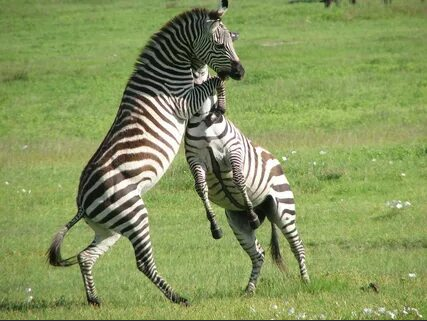

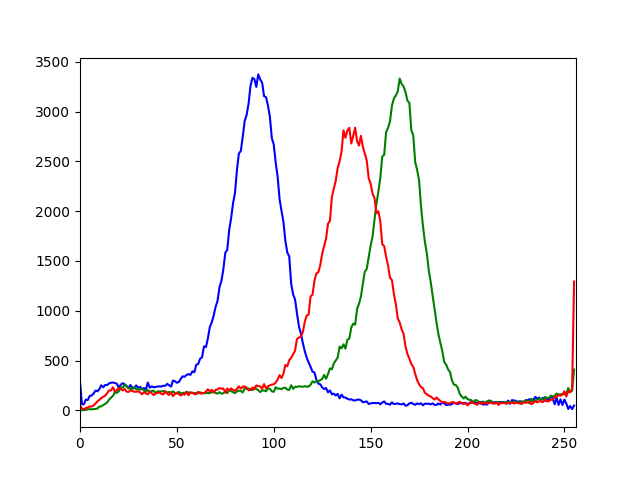

In [ ]:
list_arg = [
        (list_of_color[0], 'r'),
        (list_of_color[1], 'g'),
        (list_of_color[2], 'b')
    ]

    with multiprocessing.Pool(multiprocessing.cpu_count()) as p:
        p.map(show_hist, list_arg)

In [ ]:
Отрисовка гистограмм

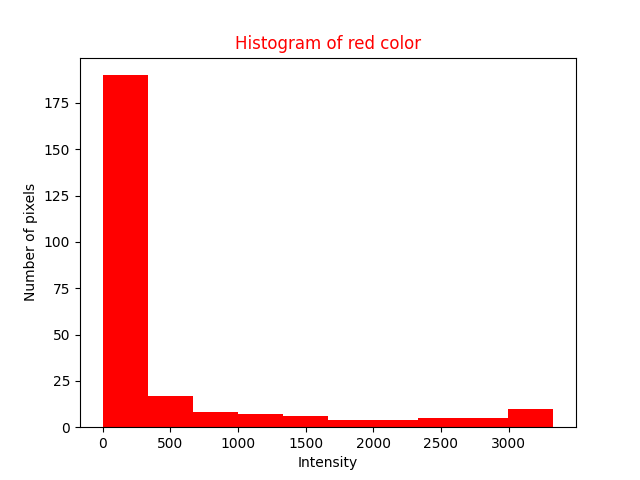

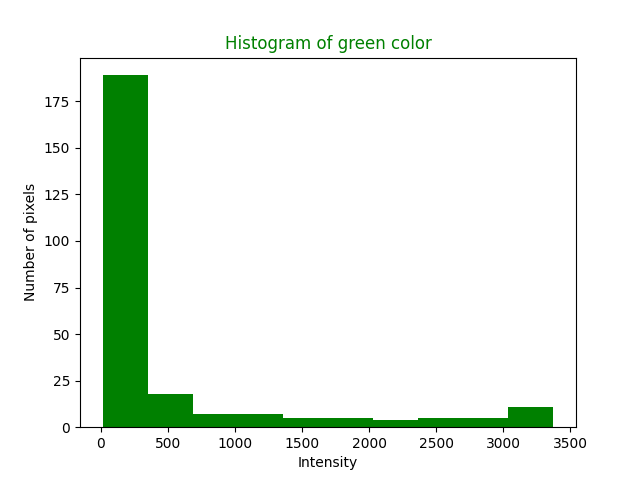

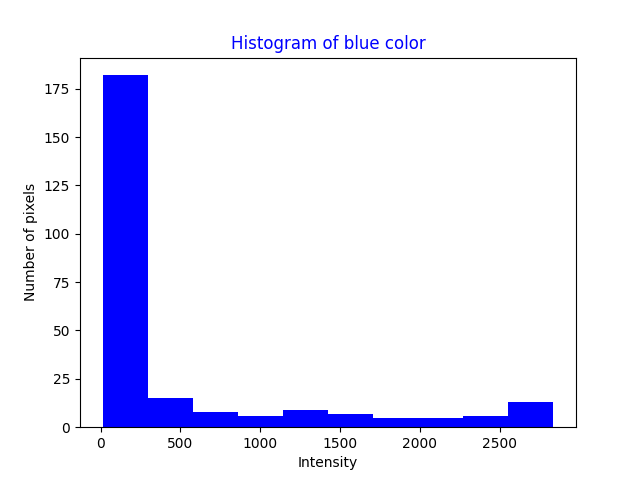